# Midterm project

We are giving you a dataset and asking you to create a model to make predictions.
This assignment is less structured than the previous ones.  It is intended to be similar to what a potential
employer would give you to evaluate your skills.

So: time to show off ! Use the knowledge you have acquired in the first 7 weeks of the course to create a Jupyter notebook that presents your work (and you) in the best light.

As usual, a "correct answer" (e.g., highly predictive model) is only part of the goal.
Your entire research methodology should be evident, as per the "Recipe for ML" we have discussed in class.


# The problem

You are given a dataset of customers who have applied for credit.
Each customer is associated with some number of attributes, and a rating of being a Good/Bad credit risk.

## The dataset

- The dataset is given in the file "credit_data.csv".
- Each row corresponds to one customer.
- There are 20 attributes, some numeric and some categorical.
- The last column "Credit Risk" encodes whether the customer was judged to be a Good/Bad credit risk
    - 1: Good credit risk
    - 2: Bad credit risk

You will use this data to come up with a model that predicts "Credit Risk" for a customer from the customer's attributes.

### Attributes

A description of the attributes is given in the plain text file "credit_data_attributes.txt".

You will notice that the values for many attributes are encoded as strings.
For example, attribute 7 is the customer's Employment Status, having possible values
A71, A72, .., A75.  Per the file, "A71" means the customer is unemployed.

#### Currency

The currency units are "DM" (old German currency: the Deutsche Mark).

As you might guess: this data is not recent; you may find anachronisms other than the currency.

# Your submission

There are some ground rules, mainly to make grading easier for the GA and instructor.

Your `sklearn` model should be stored in the variable `credit_model`; this will allow the GA to apply `sklearn` methods to this variable to evaluate your predictions, e.g.
>`credit_model.predict( ... )`

Your submission must contain a Jupyter notebook in a file named
>LastName_FirstName_MidTerm_Project.ipynb

where `LastName` and `FirstName` should be replaced with your name (as it appears on the class roster).

**IF** your submission consists of files in addition to this one notebook, you can submit a *single* zip file.  This file **must** conform to the following rules:
- The notebook must execute, unchanged, when unzipped into *an arbitrary directory*
    - This means that all paths, e.g., to data files or modules, must be *relative* and not absolute.
    

# Getting the Data

In [1]:
import pandas as pd
import os

NOTEBOOK_ROOT = ""
CREDIT_PATH = os.path.join( NOTEBOOK_ROOT, "data")

data = pd.read_csv( os.path.join(CREDIT_PATH, "credit_data.csv") )

In [2]:
data.head()

,Attribute 1,Attribute 2,Attribute 3,Attribute 4,Attribute 5,Attribute 6,Attribute 7,Attribute 8,Attribute 9,Attribute 10,...,Attribute 12,Attribute 13,Attribute 14,Attribute 15,Attribute 16,Attribute 17,Attribute 18,Attribute 19,Attribute 20,Credit Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


# Data Exploration

In [3]:
%matplotlib inline

In [4]:
(num_obs, num_features) = data.shape
print("There are {nr} observations and {nf} attributes (including the target)".format(nr=num_obs, nf=num_features) )

There are 1000 observations and 21 attributes (including the target)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Attribute 1     1000 non-null object
Attribute 2     1000 non-null int64
Attribute 3     1000 non-null object
Attribute 4     1000 non-null object
Attribute 5     1000 non-null int64
Attribute 6     1000 non-null object
Attribute 7     1000 non-null object
Attribute 8     1000 non-null int64
Attribute 9     1000 non-null object
Attribute 10    1000 non-null object
Attribute 11    1000 non-null int64
Attribute 12    1000 non-null object
Attribute 13    1000 non-null int64
Attribute 14    1000 non-null object
Attribute 15    1000 non-null object
Attribute 16    1000 non-null int64
Attribute 17    1000 non-null object
Attribute 18    1000 non-null int64
Attribute 19    1000 non-null object
Attribute 20    1000 non-null object
Credit Risk     1000 non-null int64
dtypes: int64(8), object(13)
memory usage: 164.2+ KB


In [6]:
data.describe()

,Attribute 2,Attribute 5,Attribute 8,Attribute 11,Attribute 13,Attribute 16,Attribute 18,Credit Risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [7]:
data["Credit Risk"].value_counts()

1    700
2    300
Name: Credit Risk, dtype: int64

In [8]:
def plot_cond( df, var, conds, ax, normalize=True):
    """
    Plot probability of a value in column var of DataFrame df, conditional on conditions expressed in conds
    
    Parameters
    ----------
    df: DataFrame
    var: String.  Name of column in df whose density we will plot
    conds: Dictionary
    - keys are Strings, which are names of columns in df
    - values are values that could be compared with column at the key
    
    
    """
    plot_data = df.copy()
    title_array = []
    
    for cond, val in conds.items():
        title_array.append( "{c}={v}".format(c=cond, v=val))
        plot_data = plot_data.loc[ plot_data.loc[:, cond] == val, : ]
        
        args = { "kind": "bar"}
        
    
    plot_data = plot_data.loc[:, var ]
    
    title = ", ".join(title_array)
    title = "Prob({v} | {t})".format(v=var, t=title)
    plot_data.value_counts(normalize=normalize).sort_index().plot(title=title, ax=ax, **args)
    
def plot_conds(df, specs):
    """
    Print multiple conditional plots using plot_cond
    
    Parameters
    -----------
    df: DataFrame
    specs: List. Each element of the list is a tuple (var, conds)
    -  each element of the list generates a call to plot_cond(df, var, conds)
    """
    num_specs = len(specs)
    ncols=3
    nrows = max(1,round(.4999 + num_specs/ncols))
  
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*4, num_specs*1.5))
    
    # Make sure axes is an array (special case when num_attrs==1)
    if num_specs == 1:
        axes =np.array( [ axes ])
        
    for i, spec in enumerate(specs):
        if spec is None:
            continue
        (var, conds) = spec
        plot_cond(df, var, conds, ax=axes.flatten()[i])

In [9]:
import matplotlib.pyplot as plt

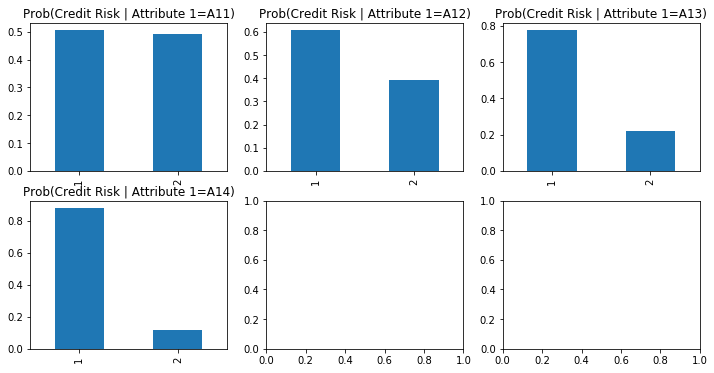

In [10]:
plot_conds(data, [ ("Credit Risk", { "Attribute 1": "A11"}),
                        ("Credit Risk", { "Attribute 1": "A12"}),
                        ("Credit Risk", { "Attribute 1": "A13"}),
                        ("Credit Risk", { "Attribute 1": "A14"}),

                       ]
          )

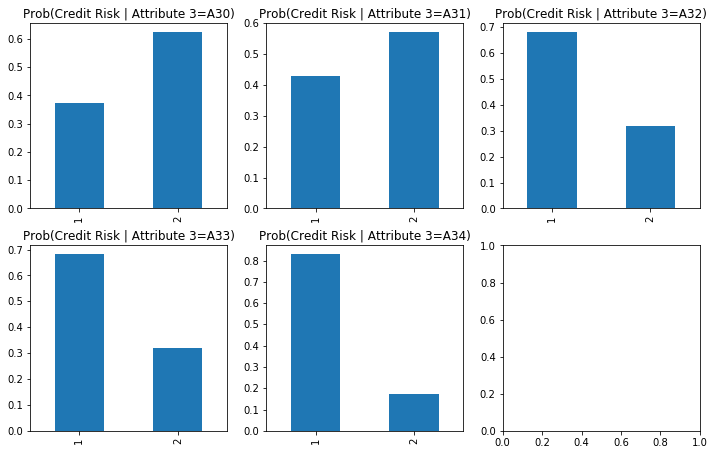

In [11]:
plot_conds(data, [ ("Credit Risk", { "Attribute 3": "A30"}),
                        ("Credit Risk", { "Attribute 3": "A31"}),
                        ("Credit Risk", { "Attribute 3": "A32"}),
                        ("Credit Risk", { "Attribute 3": "A33"}),
                        ("Credit Risk", { "Attribute 3": "A34"}),
                  

                       ]
          )

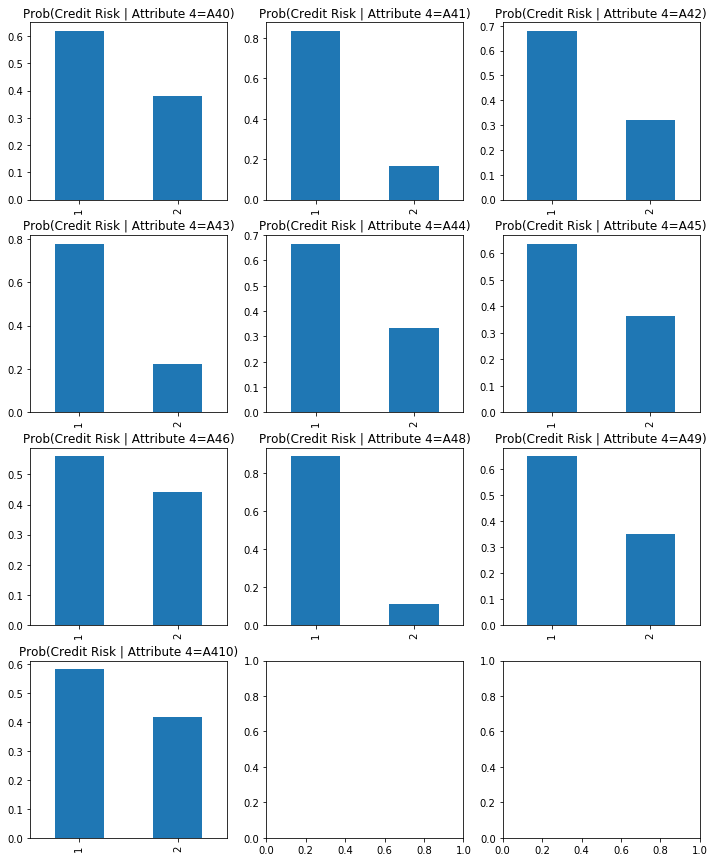

In [12]:
plot_conds(data, [ ("Credit Risk", { "Attribute 4": "A40"}),
                        ("Credit Risk", { "Attribute 4": "A41"}),
                        ("Credit Risk", { "Attribute 4": "A42"}),
                        ("Credit Risk", { "Attribute 4": "A43"}),
                        ("Credit Risk", { "Attribute 4": "A44"}),
                        ("Credit Risk", { "Attribute 4": "A45"}),
                        ("Credit Risk", { "Attribute 4": "A46"}),
                        ("Credit Risk", { "Attribute 4": "A48"}),
                        ("Credit Risk", { "Attribute 4": "A49"}),
                        ("Credit Risk", { "Attribute 4": "A410"}),

                  

                       ]
          )

No handles with labels found to put in legend.


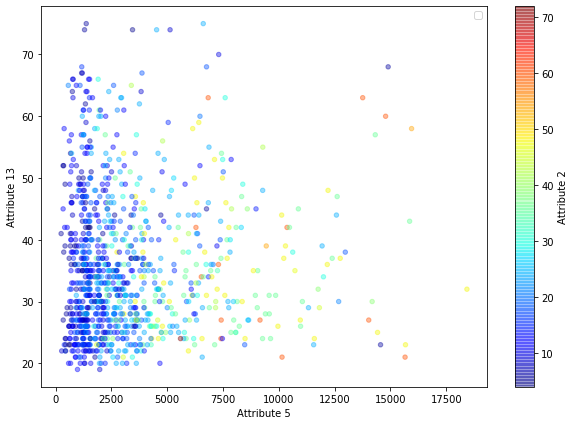

In [13]:
data.plot(kind="scatter", x="Attribute 5", y="Attribute 13", alpha=0.4,
     figsize=(10,7),
    c="Attribute 2", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

Haha, nothing except from smartness!

# Data Cleaning

In [14]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder 
from sklearn.pipeline import FeatureUnion

In [15]:
num_features = ["Attribute 2", "Attribute 5", "Attribute 8", "Attribute 11","Attribute 13","Attribute 16","Attribute 18"]
cat_features = ["Attribute 1", "Attribute 3", "Attribute 4", "Attribute 6","Attribute 7","Attribute 8","Attribute 9","Attribute 10", "Attribute 12", "Attribute 14", "Attribute 15","Attribute 17","Attribute 19","Attribute 20","Credit Risk"]

In [16]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [17]:
num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector( num_features )),
    ])

cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector( cat_features )),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])


preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [18]:
data_1 = preprocess_pipeline.fit_transform(data)

In [19]:
y_train = data_1[:800,-2]

In [20]:
y_test = data_1[800:,-2]

In [21]:
y_train.shape

(800,)

In [22]:
X_train = data_1[:800,:-2]

In [23]:
X_test = data_1[800:,:-2]

In [24]:
X_train.shape

(800, 65)

# Model

## Baseline Model

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier

strats = { "stratified": {}, 
          "uniform": {},
          "constant": {"constant": True}
         }
    
plt_num = 1

# Compute Accuracy for various baseline classifiers
for strat, args in strats.items():
    dmy_clf = DummyClassifier(strategy=strat, **args)
    acc_scores_dmy = cross_val_score(dmy_clf, X_train, y_train, cv=5, scoring="accuracy")
    
    print("{s}: Accuracy = {a:.2f}".format(s=strat, a=acc_scores_dmy.mean()))

stratified: Accuracy = 0.61
uniform: Accuracy = 0.51
constant: Accuracy = 0.70


## Machine Learning Model

In [26]:

from sklearn import linear_model, preprocessing, model_selection 

# New version of sklearn will give a warning if you don't specify a solver (b/c the default solver -- liblinear -- will be replaced in future)
logistic_clf = linear_model.LogisticRegression(solver='liblinear')

from sklearn.svm import SVC
svm_clf = SVC(gamma="auto")

from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [27]:
scores_logistic = cross_val_score(logistic_clf, X_train, y_train, cv=5)
SCORE_LOGESTIC = scores_logistic.mean()
SCORE_LOGESTIC

0.7425194831829367

In [28]:
scores_svm = cross_val_score(svm_clf, X_train, y_train, cv=5)
SCORE_SVM = scores_svm.mean()
SCORE_SVM

0.6925187995624829

In [29]:
scores_forest = cross_val_score(forest_clf, X_train, y_train, cv=5)
SCORE_FOREST = scores_forest.mean()
SCORE_FOREST

0.762441843431384

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(20)
scores_knn = cross_val_score(knn_clf, X_train, y_train, cv=5)
SCORE_KNN = scores_knn.mean()
SCORE_KNN

0.6737527833118481

# Analysis

In [31]:
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
import numpy as np

In [32]:
predicted = cross_val_predict(forest_clf, X_train, y_train, cv=5)
expected = y_train
confusion_mat = metrics.confusion_matrix(expected, predicted)

In [33]:
# %load mnist_plot_confusion.py
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        # Normalize by row sums
        cm_pct = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around( 100 * cm_pct, decimals=0).astype(int)
        
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        # Plot coordinate system has origin in upper left corner
        # -  coordinates are (horizontal offset, vertical offset)
        # -  so cm[i,j] should appear in plot coordinate (j,i)
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Normalized confusion matrix


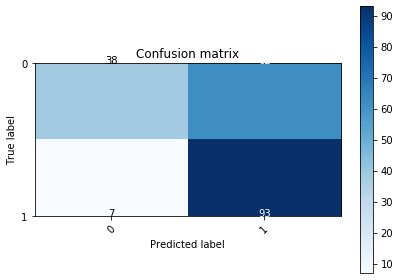

In [34]:
plot_confusion_matrix(confusion_mat, range(2),normalize=True)

# Further Exploration

In [35]:
for i in range(10,140,10):
    forest_clf = RandomForestClassifier(n_estimators=i, random_state=42)
    scores_forest = cross_val_score(forest_clf, X_train, y_train, cv=5)
    SCORE_FOREST = scores_forest.mean()
    print("n_estimator = ",i,"score:",SCORE_FOREST)


n_estimator =  10 score: 0.7087299796867066
n_estimator =  20 score: 0.738715037696785
n_estimator =  30 score: 0.7549415504511896
n_estimator =  40 score: 0.7550042482128209
n_estimator =  50 score: 0.7524495097464745
n_estimator =  60 score: 0.757433884136099
n_estimator =  70 score: 0.7524416481112544
n_estimator =  80 score: 0.7524337864760343
n_estimator =  90 score: 0.7524182585257237
n_estimator =  100 score: 0.762441843431384
n_estimator =  110 score: 0.7636996074065394
n_estimator =  120 score: 0.7674497050666041
n_estimator =  130 score: 0.7624497050666041


We know that n_estimator is a very important estimator: A too big n will cause over fitting and a very small n will cause underfitting. So I try different n in random forest model. However, the defult value of n is 100 and the result is better than every result in the eeperiment above. And I apply a similar method to KNN.

In [36]:
for i in range(1,20,3):
    knn_clf = KNeighborsClassifier(i)
    scores_knn = cross_val_score(knn_clf, X_train, y_train, cv=5)
    SCORE_KNN = scores_knn.mean()
    print(i,":",SCORE_KNN)

1 : 0.6210881772725496
4 : 0.5986892066096332
7 : 0.6699483378256963
10 : 0.6611901832102817
13 : 0.6812608402671978
16 : 0.6775263682175086
19 : 0.6875343275127934


Next, I will do some exploration with logistic regression.

In [37]:
predicted_1 = cross_val_predict(forest_clf, X_train, y_train, cv=5)
expected = y_train
confusion_mat_1 = metrics.confusion_matrix(expected, predicted_1)

Normalized confusion matrix


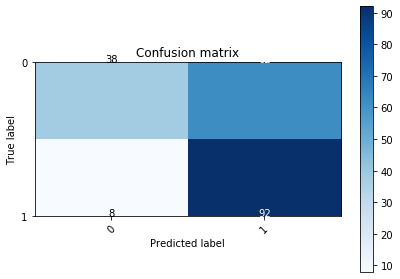

In [38]:
plot_confusion_matrix(confusion_mat_1, range(2),normalize=True)

In the logestic regression we find that so many people with bad credit risk are predicted as people with good credit risk.

In [39]:
y_scores = cross_val_predict(logistic_clf, X_train, y_train, cv=5,
                             method="decision_function")

In [40]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    _ = plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    _ = plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    _ = plt.xlabel("Threshold", fontsize=16)
    _ = plt.legend(loc="upper left", fontsize=16)
    _ = plt.ylim([0, 1])

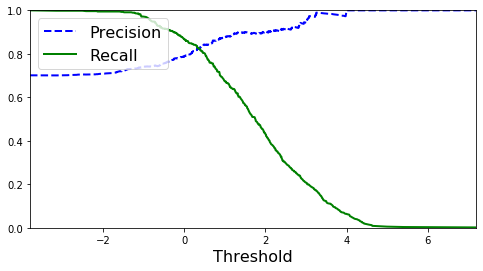

In [41]:
_ = plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
_ = plt.xlim([ thresholds.min(), thresholds.max()])

_ = plt.show()

From the chart we could find that Precision is always very high, which is resulted from high good credit risk; when I do not know what the situaltion of credit risk of a new person, we would better regard him as a good one for precision. And that is the reaon of high false nagetive value.

# Final Model

Based on above analysis, I decide to choose random forest model with n_estimator equaling to 100 as my final model.

Probably we do not use the same function to transform the data from csv into nparray that we could use and the method we use to deal with categorical data and the order of our data may be different as well, so please use the following function to transform data if it could help.Or you could simply use your data to first fit the random forest model and then test it.

In [42]:
def credit_model_datacleaning(test_data):
    test = preprocess_pipeline.transform(test_data)
    return train[:,-2],train[:,:-2]

In [43]:
credit_model = RandomForestClassifier(n_estimators=120, random_state=42)

In [44]:
credit_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [45]:
y_predict = credit_model.predict(X_test)

In [46]:
Accuracy = (y_predict==y_test).mean()

In [47]:
Accuracy

0.75